# Машинное обучение



> **Машинное обучение** - процесс, в результате которого машина (компьютер) способна показывать поведение, которое в нее не было заложено (запрограммировано). *1959*.

Обучение происходит в результате ознакомления с некоторыми правилами, на основе опыта. Отсюда выделяются несколько способов обучения:


*   дедуктивное (аналитическое): экспертные системы
*   индуктивное (статистическое)
*   комбинированное

Нас интересует обучение, основанное на опыте, - индуктивное.

Задачи инрдуктивного обучения:


*   обучение по прецедентам (с учителем, `supervised learning`)
*   обучение без учителя (`unsupervised learning`)
*   активное обучение (`active learning`)
*   обучение с подкреплением (`reinforcement learning`)

Рассмотрим задачи обучения с учителем и без учителя.




## Обучение по прецедентам

$X$ - множество объектов
$Y$ - множество допустимых ответов (метки)
Между $x \in X$ и $y \in Y$ существует неизвестная зависимость, позволяющая оценить вероятность появления метки у объекта. Зависимость известная только на объектах из обучающей выборки: $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(N)}, y^{(N)})\}$.

Пара $(x^{(i)}, y^{(i)})$ называется прецедентом. Соответственно, задача обучения по прецедентам: восстановить зависимость, научиться для новых объектов предсказывать метки.

Виды задач обучения по прецедентам:


*   классификация: $Y = \{1, ..., M\}$ / $Y = \{1, 0\}^{M}$; известно множество непересекающихся (или пересекающихся)классов; необходимо определить, какому классу принадлежит объект; в простейшем случае классов два
*   восстановление регрессии: $Y = \mathbb{R}$; необходимо предсказывать конкретное значение по признакам



### Линейная регрессия

Метод моделирования измеряемых данных. Данные состоят из пар значений зависимой переменной (метки) и независимых переменных (объектов). Зависимая переменная - сумма значений некоторой модели и случайной величины: $y_i = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n + \epsilon_i$. Параметры настраиваются так, чтобы регрессионная модель наилучшим образом приближала данные. Задача заключается в посике такого набора параметров $\theta$, чтобы получались как можно лучшие результаты в предсказании $y$. Обычно подбор параметров происходит градиентным спуском (или стохастическим градиентным спуском).

Функция потерь - обычно квадратичная (для классификации - пороговая)
> **Оценка качества:** критерием качества приближения (целевой функцией) обычно является среднеквадратичная ошибка (характеризует отклонение реальных данных от линии регрессии и измеряется в тех же единицах, что и зависимая переменная $y$). Еще одной метрикой является коэффициент детерминации, варьюрующийся от 0 до 1. Он является долей дисперсии зависимой переменной. Чем ближе к 1, тем выше точность модели. Очень хорошей моделью считается модель с коэффициентом детерминации выше 0.8, приемлемо хорошей - хотя бы выше 0.5.

> **Классический пример:** предсказание цен на квартиры по площади, определение уровня интеллекта по объему мозга


Простым языком про линейную регрессию можно почитать [тут](https://your-scorpion.ru/linear-regression-python/) и [тут](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931), про оценку [здесь](http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/).

Про регуляризацию: [ссылка](https://craftappmobile.com/l1-vs-l2-regularization/).

Посмотрим пример на данных о ценах на машины [отсюда](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes/tasks?taskId=1258).

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
toyota = pd.read_csv('/content/drive/MyDrive/CompLing/toyota.csv')
toyota.sample(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2658,Yaris,2018,9950,Manual,20559,Petrol,150,58.9,1.5
4951,Aygo,2018,7714,Manual,20872,Petrol,145,56.5,1.0
3828,Aygo,2017,7498,Manual,23555,Petrol,145,68.9,1.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(toyota[["mileage", "tax", "mpg", "engineSize"]].to_numpy(), toyota.price.to_numpy(), train_size = 0.7)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train) # коэффициент детерминации

0.7240927405588212

In [ ]:
reg.score(X_test, reg.predict(X_test))

In [ ]:
mean_squared_error(y_test, reg.predict(X_test), squared=False) # MSE

3352.308802797441

In [ ]:
pd.DataFrame.from_records(data=[list(y_test), list(reg.predict(X_test))])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,18200.000000,6995.000000,12450.000000,10995.000000,7299.00000,19523.000000,23698.000000,13499.000000,6795.00000,15499.000000,9995.000000,13885.000000,6995.000000,6900.000000,15795.000000,8250.000000,8495.000000,7991.000000,9499.000000,18000.000000,10000.000000,6350.000000,8799.000000,5999.000000,8588.000000,7791.00000,7498.000000,8750.000000,6399.000000,9850.000000,17499.000000,19398.00000,20995.000000,6890.000000,9985.000000,16985.000000,24995.000000,11990.000000,15895.000000,16795.000000,...,9995.000000,6000.000000,2495.000000,5995.000000,28590.000000,21298.000000,6750.000000,12998.000000,15800.000000,5698.000000,10998.000000,22200.000000,11999.000000,19400.000000,12000.000000,18450.000000,9291.000000,13491.000000,9391.000000,14295.000000,15495.000000,13495.000000,8498.000000,7845.000000,27249.000000,14995.000000,13995.000000,24990.000000,6990.000000,22700.00000,23990.000000,27545.000000,8295.000000,11732.000000,8901.000000,12195.000000,10295.000000,19999.000000,11995.000000,8260.000000
1,19509.070004,8269.990051,14986.145224,13062.937223,4292.68552,16993.962482,22120.184852,14828.624491,5816.98121,10460.601239,10286.468503,15019.510319,8505.752883,3572.587306,15945.015353,15340.104659,8617.601082,5711.816522,12997.410843,17506.269498,12892.200992,7902.711632,10472.662507,6257.310111,9260.081397,8127.72435,7357.046097,13418.613108,7706.760765,9975.779952,16241.366082,23933.00753,15669.592018,6625.809845,11379.974366,8475.299058,18647.811886,14828.798097,15971.930261,9780.579505,...,9907.683763,5570.334754,-4063.257665,6859.014687,23750.531931,26940.526256,9114.071968,14603.631687,15766.945861,2420.408009,14674.484838,18943.275649,9111.515081,25328.426193,16235.786362,18540.507947,8926.019459,15429.579371,10280.144235,17152.611155,13812.552977,13809.976098,10584.647875,8880.593668,19960.959624,12586.574383,15071.155153,27009.921377,5367.958174,19400.46875,24990.324173,27022.569913,9367.562312,15294.269449,8823.062278,14440.640331,11598.688401,19743.484972,15677.213166,8846.888591


Точность можно повысить, нормализовав остальные признаки и добавив их в матрицу признаков.

Линейная регрессия вполне может производиться и по одному признаку, тогда она становится одномерной. При количестве признаков больше 1 - регрессия многомерна.

### Логистическая регрессия

Статистическая модель, используемая для предсказания вероятности возникновения некоторого события путем подгонки данных к логистической кривой. Это метод построения линейного классияикатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

В основе лежит идея о том, что пространство исходных значений может быть разделено линейной границей на две области, представляющие собой классы. По сути - бинарная классификация.

Для логистической регрессии типично переобучение, т.е. ситуация, когда модель показывает хорошие результаты на обучающей выборке, но имеет плохие обобщающие свойства. Чем сложнее модель, тем более вероятно переобучение.

Причины возникновения переобучения:
*   мультиколинеарность: столбцы матрицы признаков $X$ образуют систему, близкую к линейно зависимой
*   наличие неинформативных признаков
*   слишком мало данных для корректного определения признаков

Для уменьшения эффекта переобучения часто применяется логистическая регрессия с регцляризацией.



Принципиально подход к построению и оценке модели не отличается от предыдущего. [Ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) на пример в документации `sklearn`. 

### Метод ближайших соседей (kNN)

Алгоритм классификации, основанный на оценивании сходства объектов. Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки. Если мера сходства объектов выведена удачно, то схожие объекты будут чаще оказываться в одном классе, чем в разных.

> **Как происходит**: в обучающей выборке находятся $k$ ближайших к интересующему объектов, затем объекту $x$ сопоставляется самый часто встречающийся среди $k$ соседей класс

**Преимущества:** 
*   легко интерпретируемая логика
*   не требуется серьезное обучение
*   может быть применен к объектам любой сложности, если задана функция близости

**Недостатки:**
*   при $k = 1$ неустойчив к выбросам (проблема ршается увеличением количества соседей на тестовой выборке)
*   медленный, тянет много памяти
*   с ростом размерности пространства ухудшается точность (решается снижением размерности, например, методом главных компонент)

В качестве расстояния обычно достаточно евклидова.

Единицы измерения признаков (необходима нормализация!) и отбор самих признаков остается на совести пользователя алгоритма.



Для демонстрации работы алгоритмов возьмем небольшой датасет про животных [отсюда](https://www.kaggle.com/uciml/zoo-animal-classification).

In [ ]:
zoo = pd.read_csv('/content/drive/MyDrive/CompLing/zoo.csv')
zoo.sample(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
58,penguin,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1,2


In [ ]:
zoo.shape

(101, 18)

Сто строк - мало, но попробуем.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import * 
from sklearn.metrics import plot_confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(zoo.to_numpy()[:,1:-1], zoo.class_type.to_numpy(), train_size = 0.7)

In [ ]:
kNN_1 = KNeighborsClassifier(n_neighbors=1)
kNN_2 = KNeighborsClassifier(n_neighbors=2)
kNN_3 = KNeighborsClassifier(n_neighbors=3)
kNN_4 = KNeighborsClassifier(n_neighbors=4)

In [ ]:
kNN_1.fit(X_train, y_train)
print(classification_report(y_test, kNN_1.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         5
           3       0.50      0.50      0.50         2
           4       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.77      0.79      0.77        31
weighted avg       0.91      0.94      0.92        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Уже при $k = 1$ получается достаточно высокая точность классификации.

In [ ]:
kNN_2.fit(X_train, y_train)
print(classification_report(y_test, kNN_2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.90        31
   macro avg       0.68      0.71      0.70        31
weighted avg       0.85      0.90      0.87        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


А при $k = 2$ значительно ниже.

In [ ]:
kNN_3.fit(X_train, y_train)
print(classification_report(y_test, kNN_3.predict(X_test)))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.88      0.94      0.91        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
kNN_4.fit(X_train, y_train)
print(classification_report(y_test, kNN_4.predict(X_test)))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.88      0.94      0.91        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


С увеличением $k$ точность понижается.

Для визуализации оценки модели хорошо строить матрицу неточностей (confusion matrix).

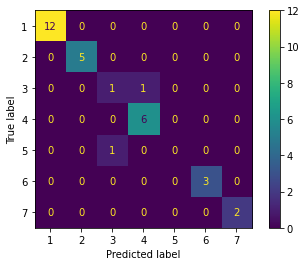

In [ ]:
plot_confusion_matrix(kNN_1, X_test, y_test);

На большем количестве строк и не готовом к классификации датасете так хорошо сразу получаться не будет.

**Пример:** телеграм-бот, определяющий вид дерева по фото листа. Классификатор построен на kNN с $k = 3$. [Ссылка на гитхаб](https://github.com/vienmoir/Botanicum).

### Наивный байесовский классификатор

Вероятностная модель классификации, учитыващая априорные (известные до эксперимента) и апостериорные (формирующиеся после эксперимента) вероятности событий. Наивный байесовский классификатор основывается на формуле Байеса:

$p(x|y) = \frac{p(y|x)p(y)}{p(x)}$

*   $p(y|x)$ - вероятность класса $y$ для объекта $x$
*   $p(y)$ - априорная вероятность класса $y$
*   $p(x|y)$ - вероятность того, что объект $x$ принадлежит классу $y$
*   $p(x)$ - вероятность объекта $x$ в множестве $X$

Байес наивный, т.к. считает все признаки независимыми. Часто и успешно используется для классификации текстовых данных.


> **Классический пример:** спам-фильтр на основе наивного байесовского классификатора



Посмотрим, как отработает наивный байесовский классификатор на нетекстовых данных. Продолжаем пример с животными.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(zoo.to_numpy()[:,1:-1], zoo.class_type.to_numpy(), train_size = 0.7)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.90        31
   macro avg       0.80      0.85      0.82        31
weighted avg       0.86      0.90      0.88        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Для датасета в 100 строк 90% точности - весьма неплохой результат. Можно улучшить, варьируя размер обучающей выборки, коэффициент сглаживания ($\alpha$) и матрицу признаков.

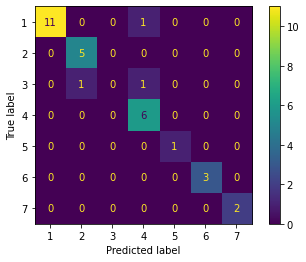

In [ ]:
plot_confusion_matrix(clf, X_test, y_test);

### Оценка модели классификации

В результате классификации возможны 4 ситуации:
1.   True Positives: верно классифицированы положительные примеры (истинно положительные случаи)
2.   True Negatives: верно классифицированы отрицательные примеры (истинно отрицательные случаи)
3.   False Negatives: положительные примеры, классифицированные как отрицательные (интересующее нас событие ошибочно не обнаруживается, ложно отрицательные случаи, ошибка 1 рода)
4.   False Positives: отрицательные примеры, классифицированные как положительные (при отсутствии примера выносится решение о его присутствии, ложно положительные случаи, ошибка 2 рода)

Стандартными метриками для оценки качества классификации являются точность (`precision`, доля true positives), полнота (`recall`, доля true positive относительно всех объектов выборки) и их среднее гармоническое F1-мера:

$$F_1 = \frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{\mathrm{tp}}{\mathrm{tp} + \frac12 (\mathrm{fp} + \mathrm{fn}) } $$

Также рассматривают метрику `accuracy` - процент объектов, по которым классификатор принял правильное решение.

Легко построить алгоритм со 100%-й полнотой: он все объекты относит к классу 1, но при этом точность может быть очень низкой. Нетрудно построить алгоритм с близкой к 100% точностью: он относит к классу 1 только те объекты, в которых уверен, при этом полнота может быть низкая.

Для сравнения классификаторов применяется ROC-кривая.


## Обучение без учителя

От задачи обучения по прецедентам отличается тем, что для объектов обучающей выборки не известны значения $y^{(i)}$, а часто и само множество $Y$.

Формально к задачам обучения без учителя относят четыре задачи:
*   кластеризация
*   визуализация
*   детектирование аномалий
*   снижение размерности

По сути все эти задачи решаются кластеризацией, заключающейся в следующем: есть множество объектов $X = \{x^{(1)}, x^{(2)}, ..., x^{(N)}\}$ (обучащая выборка), между объектами множества $X$ задана некоторая функция расстояния $p$. Алгоритм кластеризации присваивает каждому объекту метку кластера на основе расстояния между объектами.

Применение кластерного анализа в общем виде сводится к следующим этапам:
* Отбор выборки объектов для кластеризации.
* Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости – нормализация значений переменных.
* Вычисление значений меры сходства между объектами.
* Применение метода кластерного анализа для создания групп сходных объектов (кластеров).
* Представление результатов анализа.
* Оценка результатов кластерного анализа. И возможная корректировка выбранной метрики и метода кластеризации до получения лучшего результата.

[Цели кластеризации
](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F)

* Понимание данных путём выявления кластерной структуры. Разбиение выборки на группы схожих объектов позволяет упростить дальнейшую обработку данных и принятия решений, применяя к каждому кластеру свой метод анализа (стратегия «разделяй и властвуй»).
* Сжатие данных. Если исходная выборка избыточно большая, то можно сократить её, оставив по одному наиболее типичному представителю от каждого кластера.
* Обнаружение новизны (novelty detection). Выделяются нетипичные объекты, которые не удаётся присоединить ни к одному из кластеров.


**Меры расстояний** (меры сходства)

Для каждой пары объектов измеряется «расстояние» между ними — степень похожести. Существует множество метрик, вот лишь основные из них:
* евклидово расстояние (и его квадрат)
* расстояние Минковского
* манхэттенское расстояние
* расстояние Чебышёва

Для алгоритмов иерархической кластеризации требуется считать расстояние между кластерами для этого вводятся дополнительные методы (о них ниже).

**Методы кластеризации**
* Иерархическая кластеризация. Упорядочивание данных путем создания иерархии вложенных кластеров. [Пример применения на sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
* K-средних
* DBSCAN
* Вероятностные алгоритмы кластеризации. Каждый объект из обучающей выборки относится к каждому из кластеров с определенной степенью вероятности (например, EM-алгоритм)

[Применение разных методов кластеризации с одинаковым наборам данных.](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

Пример иерархической кластеризации для [определения авторства](https://github.com/dhhse/dhcourse/blob/master/stylometry/stylometry_minor.md).

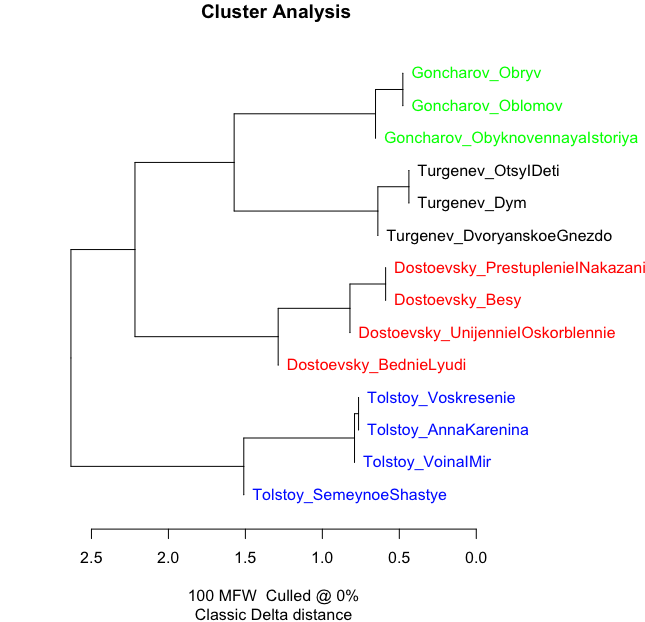

Есть два вида метрик оценки качества кластеризации:
1. внешние - используют дополнительные знания о кластерах (распределение по кластерам, количество кластеров)
2. внутренние - оценивают качество полученной структуры, не используя внешнюю информацию

Обычно данных о метках нет, поэтому имеет смысл в большей степени ориентироваться на внутренние метрики. В `sklearn` есть [следующие](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics):


*   силуэт: показывает, насколько объект похож на свой кластер относительно других кластеров; если значение стремится к `1` - хорошее разбиение, если к `-1` - плохое, если в районе `0` - кластеры пересекаются
*   индекс Дэвиcа-Болдуина: оценивает расстояние от объекта кластера до центроида и расстояние между центроидами; чем ниже, тем лучше разбиение



### K-means

Итеративный алгоритм, основанный на минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров. Суть в следуюшем: на вход поступает количество кластеров (`k`) и вектор признаков. Далее все объекты делятся на `k` групп, в которых выделяются начальные центры кластеров. Затем центр итеративно оптимизируется в зависимости от расстояния между объектами кластера и центром. Чем ближе объекты друг к другу, тем выше вероятность, что они относятся к одному кластеру. Алгоритм завершается, когда на некоторой итерации перестает изменяться внутрикластерное расстояние.

In [ ]:
from IPython.display import Image
Image(url='https://sandipanweb.files.wordpress.com/2017/03/kmeans2.gif?w=354')

По [ссылке](https://colab.research.google.com/drive/11haMKv3WWuPCUrHXoSd-Miv9n9QaPM_t?usp=sharing) примеры работы K-means и LDA на текстовых данных.

### DBSCAN

Основанная на плотности пространственная кластеризация для приложений с шумами (англ. ''Density-based spatial clustering of applications with noise'', ''DBSCAN''). Алгоритм группирует в один кластер точки в области с высокой плотностью. Одиноко расположенные точки помечает как шум.

In [ ]:
Image(url='https://media.giphy.com/media/W2d4WAjY8v2UgvunHG/giphy.gif')

Вернемся к датасету с классификацией животных.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X = zoo.to_numpy()[:,1:-1]
dbscan = DBSCAN(eps=0.97, min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.97, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
vec = dbscan.fit_predict(X)

In [ ]:
[(i, list(vec).count(i)) for i in set(vec)]

[(0, 6), (1, 5), (2, 10), (3, 4), (4, 4), (-1, 72)]

In [ ]:
zoo["dbscan"] = list(vec)

In [ ]:
for i in zoo.index.values:
  if zoo.dbscan[i] != -1:
    print(zoo.dbscan[i], zoo.class_type[i])

0 1
1 4
2 1
0 1
3 1
1 4
2 1
1 4
0 1
0 1
0 1
3 1
1 4
4 2
2 1
2 1
2 1
2 1
0 1
4 2
1 4
2 1
3 1
2 1
2 1
3 1
4 2
2 1
4 2


Отчасти логика в результате есть, но слишком много значений попало в "выбросы".

# Интересные ресурсы для визуализации без программирования

1. [Tableau](https://www.tableau.com/) - делает красивые (очень) визуализации. Может даже сам подобрать подходящую вашим данным визуализацию.
2. [Flourish](https://flourish.studio/) - онлайн-ресурс для создания визуализаций и дата-сторителлинга. Интуитивно понятен в работе. Не дружит с кириллицей при загрузке данных.

> **Дата-сторителлинг** - дословно составление историй на основе данных.

Составляется после анализа данных. Может быть представлен как одной, так и несколькими объектами визуализации. Главное - чтобы графики были максимально информативны и интуитивно понятны. Иногда несколько визуализаций размещаются на одном слайде, как постерная презентация.

Суть дата-сторителлинга - показать информацию, скрытую за цифрами таблиц, обощить знания о данных и наглядно их представить. Иногда для корректной интрепретации требуется изучить гипотезы о данных в дополнительных источниках.

Трогательно про дата-сторителлинг - [по ссылочке](https://bakunin.com/data-storytelling/).

